In [1]:
import io
import pandas as pd
import random
import numpy
import matplotlib.pyplot as plt
from google.colab import files


In [2]:

df = pd.read_csv('random_1000.csv')


In [3]:
df.count

<bound method DataFrame.count of                       course_id       userid_DI  ... gender ndays_act
0    HarvardX/CB22x/2013_Spring  MHxPC130069875  ...      m         4
1    HarvardX/CB22x/2013_Spring  MHxPC130114587  ...      m         4
2    HarvardX/CB22x/2013_Spring  MHxPC130122866  ...      m         1
3    HarvardX/CB22x/2013_Spring  MHxPC130470188  ...      m         2
4    HarvardX/CB22x/2013_Spring  MHxPC130263156  ...      m         2
..                          ...             ...  ...    ...       ...
995  HarvardX/CB22x/2013_Spring  MHxPC130289759  ...      f         1
996  HarvardX/CB22x/2013_Spring  MHxPC130474924  ...      m         4
997  HarvardX/CB22x/2013_Spring  MHxPC130153023  ...      f         1
998  HarvardX/CB22x/2013_Spring  MHxPC130233232  ...      m         0
999  HarvardX/CB22x/2013_Spring  MHxPC130167152  ...      f         0

[1000 rows x 7 columns]>

In [4]:
n = len(df.index) #1000
m = 10
uniform_range_lower = 0
uniform_range_upper = 1
variance = 0.7837451260849972

In [5]:
df.iloc[0]

course_id            HarvardX/CB22x/2013_Spring
userid_DI                        MHxPC130069875
final_cc_cname_DI                         India
LoE_DI                                Secondary
YoB                                        1994
gender                                        m
ndays_act                                     4
Name: 0, dtype: object

In [6]:
df.iloc[0,6]

4

In [7]:
def mean_query(df, m, n, uniform_range_lower, uniform_range_upper, variance):
  
  q = [0 for i in range(n)]
  for i in range(n):
    q[i] = int(df.iloc[i,6])
  
  random_arr = [[random.uniform(0,1) for i in range(m)] for j in range(n)]
  random_arr[0]

  for i in range(n):
    random_arr[i][-1] = q[i] - sum(random_arr[i][:-1])
  random_arr[0]

  x = zip(*random_arr)
  curator_output = []
  for y in x:
    curator_output.append(sum(y))

  curator_noisy = []
  for c in curator_output:
    curator_noisy.append(numpy.random.laplace(c, variance))

  private_ans = sum(curator_noisy)/n

  

  return private_ans

In [8]:
def true_mean_value(n):
  q = [0 for i in range(n)]
  for i in range(n):
    q[i] = int(df.iloc[i,6])
  actual_ans = sum(q)/n
  return actual_ans

In [9]:
true_mean_value(1000)

3.78

In [10]:
m_list = []
for i in range(1,n+1):
  """
  if i <= 100:
    m_list.append(i)
  elif i%10 == 0:
    m_list.append(i)
  """
  m_list.append(i)




In [11]:
private_ans = []
for m in m_list:
  y = mean_query(df=df, m=m, n=n, uniform_range_lower=uniform_range_lower, uniform_range_upper=uniform_range_upper, variance=variance)
  print(m,y)
  private_ans.append((m,y))

 


1 3.779964574978406
2 3.7788312055925792
3 3.782219865987485
4 3.7786198370405595
5 3.7770503123068537
6 3.776531855869618
7 3.7841341465589005
8 3.782241641613552
9 3.78472827468819
10 3.7743691867828084
11 3.7781929549085027
12 3.777284784682284
13 3.7806621704539505
14 3.7901460669759404
15 3.7749649385714292
16 3.7771458975680408
17 3.7801350090829047
18 3.781381140448247
19 3.7740478536258197
20 3.779071221639939
21 3.7707424153713127
22 3.778166608054603
23 3.7722689166686822
24 3.766305847349412
25 3.783117566829935
26 3.7834780147754574
27 3.7860333017314622
28 3.777423499697223
29 3.7836861223621017
30 3.7843867461430034
31 3.7792940291071355
32 3.7778058155969427
33 3.7894910523348644
34 3.787671119673727
35 3.7884141460848424
36 3.777770869954418
37 3.780564341175261
38 3.779060754214821
39 3.7846998737273405
40 3.793829392541471
41 3.7874107205942673
42 3.786711607099809
43 3.7744788425845726
44 3.781891913112013
45 3.7708925111344214
46 3.7929250403634907
47 3.783312177109

In [12]:
actual_ans = true_mean_value(n)
actual_ans

3.78

In [13]:
textfile = open("mean_query_laplace.txt", "w")
for element in private_ans:
  
  textfile.write(','.join(str(e) for e in element))
  textfile.write("\n")
textfile.close()

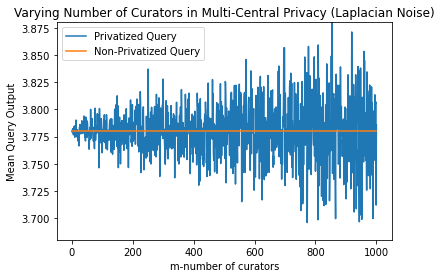

In [14]:
actual_ans_list = [actual_ans for i in range(n)]  #n=1000, m=1-1000
private_ans_list = [p[1] for p in private_ans ]

plt.plot(m_list, private_ans_list, label="Privatized Query")
plt.plot(m_list, actual_ans_list, label="Non-Privatized Query")
plt.plot()

plt.xlabel("m-number of curators")
plt.ylabel("Mean Query Output")
plt.title("Varying Number of Curators in Multi-Central Privacy (Laplacian Noise)")
plt.ylim([3.68, 3.88])
plt.legend()
plt.savefig('mean_query_laplace.png')
plt.show()

In [15]:
# #zoom plot 
# plt.plot(m_list[:100], private_ans_list[:100], label="Privatized Query")
# plt.plot(m_list[:100], actual_ans_list[:100], label="Non-Privatized Query")
# plt.plot()

# plt.xlabel("m-number of curators")
# plt.ylabel("Mean Query Output")
# plt.title("Varying Number of Curators in Multi-Central Privacy (Laplacian Noise)")
# plt.legend()
# plt.show()

In [16]:
#utility evaluation
n_list = [100, 500, 1000]
m_list2 = [1, 10, 50, 100, 500, 1000]

actual_ans = true_mean_value(n)

textfile = open("varying_n_laplace.txt", "w")
for n in n_list:
  util = []
  for m in m_list2:
    if m <= n:
      error = []
      for i in range(100):
        y = mean_query(df=df, m=m, n=n, uniform_range_lower=uniform_range_lower, uniform_range_upper=uniform_range_upper, variance=variance)
        error.append(abs(actual_ans-y)/actual_ans)
      average_error = sum(error)/len(error)
      print(n, m, average_error)
      util.append((m, average_error))

  for element in util:
    textfile.write(f'n={n},m={element[0]},error={element[1]}')
    textfile.write(','.join(str(e) for e in element))
    textfile.write("\n")

textfile.close()

100 1 0.12726143964077555
100 10 0.12683905847737864
100 50 0.129674379839818
100 100 0.12663407825615494
500 1 0.05446267583699469
500 10 0.054464697036620865
500 50 0.054118734998231506
500 100 0.05491920111499917
500 500 0.0544944487302071
1000 1 0.00021125402566274577
1000 10 0.0007334113647548356
1000 50 0.0014973234468589772
1000 100 0.0020940938456295364
1000 500 0.005489640627474129
1000 1000 0.008546712843510612
